# Final Project

### Objectives

* compute FIR and IIR(Bessel filter) on artificial generated signal using sinosudal wave with numpy noise.
* In specific, Plotting LOW,HIGH and BAND pass filtred signal and compare the DFT of all with each other.
* Compare DFT of FIR Vs IIR.
* Conclusion what parameter should be used for filter design.

PRoject Group :

* Hardik Sumera(0678223)
* Anish Prajapati(0665915)
* Anurag Rajpurohit(0867117)
* veeranjaneyulu davuluri(0861594)

# Generating the signal

        
        
  The Signal that we decided to compaere it with ultrasound signal but not exactly ultrasound. The signal consist three diffrent sine wave which hase diffrent freqencies and amplitude.
  
   * The Number of samples I choose in hundreds only because we wants to simulate the all filters fast.
   * The noise is generated by the rendom number in range of sampling frequency and samples.
   * Sampling frequency used for generating the signal is 48 KHz
   * Number of samples taken are 320.

   
        


 The time array is: 320


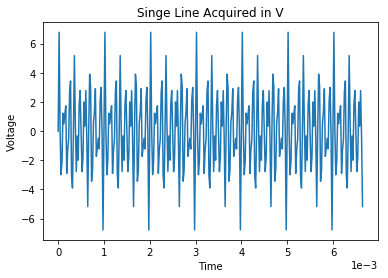

In [27]:
%matplotlib inline
import scipy.linalg
import numpy as np
from numpy import sin, arange, pi
from scipy.signal import lfilter, firwin
from scipy import signal
import pylab as pl
import matplotlib.pyplot as plt
from __future__ import division
import math

sample_rate = 48000.
nsamples = 320
# generate input signal
noisy_freq = 10e6
t = arange(nsamples) / sample_rate
noise = [np.sin(0.1 * np.pi * noisy_freq * x1/  sample_rate) for x1 in range(nsamples)]
signal = 2.9* sin(2*pi*9000*t) + 1.5*sin(2*pi*12000*t)+1* sin(2*pi*13000*t) + 1.2*sin(2*pi*15000*t)
signal= signal+noise

print('\n The time array is: ' + str(len(t)) )
plt.subplot(111)
plt.title('Signal')
plt.plot(t,signal)
plt.xlabel('Time')
plt.title('Singe Line Acquired in V')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


# zooming in signal for 2 millisecond

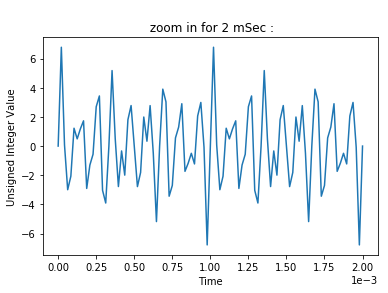

In [28]:

index=np.where(t>0.002)
index=index[0]
plt.subplot(111)
plt.plot(t[:index[0]],signal[:index[0]])
plt.title('\n zoom in for 2 mSec :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# DFT OF Signal

Now that we have a noisy and a clean signal. Here we used DFT on our signal to obtain the frequency component.

So the DFT is defined as below:

$$ A_k=\sum_{m=0}^{n-1}a_m \exp \left(-2\pi i \frac{mk}{n} \right ) [k=0,...,n-1] $$

If we notice the signal has a dc component (not centered in zero) so unless we want to have a spectrum with a large value of dc or zero frequency we will first remove the dc component (by substracting the mean of the data).

We will then obtain the DFT.[3]

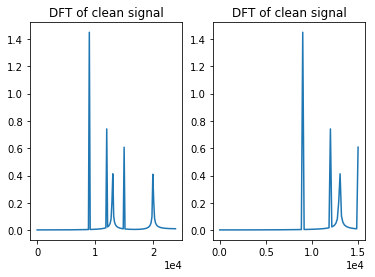

In [29]:
data=signal-np.mean(signal)
f=np.arange(0,sample_rate/2.,sample_rate/320.)
Y=np.fft.fft(signal)
L=len(data)
Pyy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, Pyy[:160])
plt.title('DFT of clean signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=np.where(f>15000)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of clean signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Example of Large Filter(Median_Filter)

## 1-D median filter


The median filter is an effective method that can, to some extent, distinguish out-of-range isolated noise from signal features such as edges and amplitude. Specifically, the median filter replaces a gain by the median, instead of the average, of all gain in a neighborhood $w$ gain .



$$ y[m,n]=median [ {x}[i],i ϵ w ] $$


where $w$ represents a neighborhood defined by the user, centered around location $[+m,-m]$ in the signal.

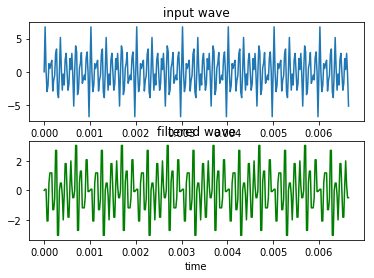

In [30]:
import scipy as sci # median filter
y1 = sci.signal.medfilt(signal,3) # add noise to the signal
# plot the results
plt.subplot(211)
plt.plot(t,signal)
plt.title('input wave')
plt.xlabel('time')
plt.subplot(212)
plt.plot(t,y1,'g')
plt.title('filtered wave')
plt.xlabel('time')
plt.show()

# Digital filters

  In signal processing, a digital filter is a system that performs mathematical operations on a sampled, discrete-time signal to reduce or enhance certain aspects of that signal. This is in contrast to the other major type of electronic filter, the analog filter, which is an electronic circuit operating on continuous-time analog signals. There are two categories of digital filter: the recursive filter and the nonrecursive filter. These are often referred to as infinite impulse response (IIR) filters and finite impulse response (FIR) filters, respectively [1].
   FIR stands for Finite IR filters, whereas IIR stands for Infinite IR filters. IIR and FIR filters are utilized for filtration in digital systems. FIR filters are more widely in use, because they differ in response. FIR filters have only numerators when compared to IIR filters, which have both numerators and denominators.


# FIR filter

  In digital signal processing, an FIR is a filter whose impulse response is of finite period, as a result of it settles to zero in finite time. This is often in distinction to IIR filters, which can have internal feedback and will still respond indefinitely. The impulse response of an Nth order discrete time FIR filter takes precisely N+1 samples before it then settles to zero. FIR filters are most popular kind of filters executed in software and these filters can be continuous time, analog or digital and discrete time. Special types of FIR filters are namely, Boxcar, Hilbert Transformer, Differentiator, Lth-Band and Raised-Cosine.[3]


# Lth-Band FIR Low-pass Filter 

   Here We use the function called FIRWin which is available in scipy library which is based on window function. The default window function is nutall that will be accepted by defualt if you we don't specify it. The cutoff frequency that I used is 10KHz so that I can reduce all low frequency like DC componenets and connecting wire noise. the signal that we want to compute is 13KHz which is easyly can exctracted from this Low-pass filter.
   
   We can see that the lenght of FIR filter that we used is 29 which is enough for computation. The ploating of Filtered signal lags behind the originol signal. This phase delay  causes because the FIR filter takes time to calculation and looping initial conditions. Even the Phase delay can be calculate by :
   
   Phase delay= (N-1/2)* Sampling time where N is length of FIR. 
   
   Observation:
   
   * FIR filter is fast and have fix phase delay . Even the phase delay is linear with the FIR coefficent .
   * Moreover we can se that how the FIR responses smoothly near to the main signal frequency. [4]

Text(0.5,1,'Frequency Response near main signal Frequency')

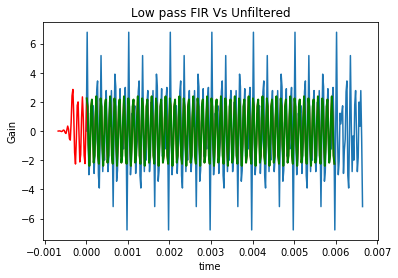

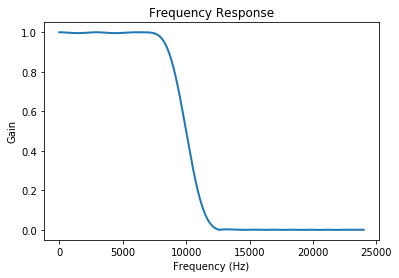

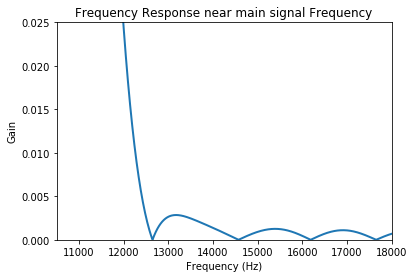

In [31]:
from numpy import sin, arange, pi
from scipy.signal import lfilter, firwin,freqz
from pylab import figure, plot,clf, xlabel, ylabel, xlim, ylim, title, grid, axes, show
nyq = sample_rate / 2.
cutoff= 10000.0 
# Length of the filter 
N = 33
fir_coeff = firwin(N, cutoff/nyq)
filtered_signal = lfilter(fir_coeff, 1.0, signal) 
delay = (N-1 / 2) / sample_rate
 
figure(1)
plot(t,signal)
plot(t-delay, filtered_signal, 'r-')
plot(t[N:]-delay, filtered_signal[N:], 'g', linewidth=2)
title('Low pass FIR Vs Unfiltered')
xlabel('time')
ylabel('Gain')

figure(2)
w, h = freqz(fir_coeff, worN=2000)
plot((w/pi)*nyq, abs(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')

figure(3)
plot((w/pi)*nyq, abs(h), linewidth=2)
xlim(10500.0,18000.0)
ylim(0.0, 0.025)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response near main signal Frequency')


 

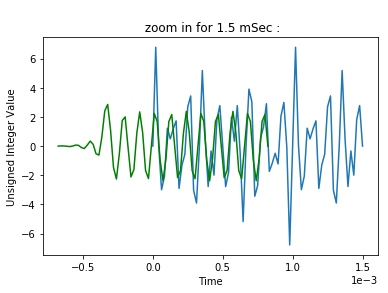

In [32]:
# low pass FIR filter dft 
index=np.where(t>0.0015)
index=index[0]
plt.subplot(111)
plt.plot(t[:index[0]],signal[:index[0]])
plt.plot(t[:index[0]]-delay,filtered_signal[:index[0]],'g')
plt.title('\n zoom in for 1.5 mSec :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


# FIR High-pass Filter & Band-pass Filter 

For High pass filter , we choose the 14.5 KHz as high pass cutoff freq. and pass the Band pass FIR in between  12.5 to 13.5 KHz.

Text(0,0.5,'Gain')

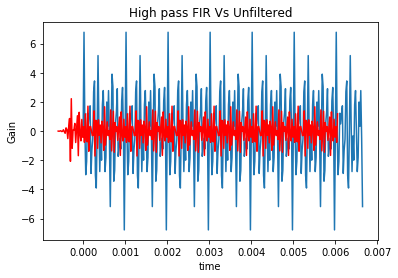

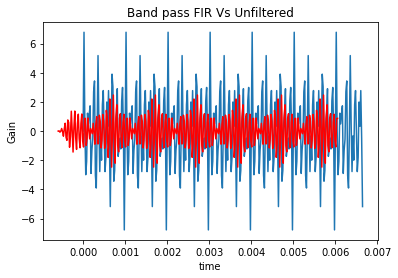

In [33]:
# High pass FIR
nyq = sample_rate / 2.
 
# The cutoff frequency of the filter: 14.5 KHz
cutoff= 14500.0
 
N = 29

fir_coeff = firwin(N,cutoff/nyq,pass_zero=False)
filtered_high = lfilter(fir_coeff, 1.0, signal)
delay = (N-1 / 2) / sample_rate

figure(1)
plot(t,signal)
plot(t-delay,filtered_high, 'r-')
title('High pass FIR Vs Unfiltered')
xlabel('time')
ylabel('Gain')


# Band Pass filter
cutoff1= 12500.0
cutoff2= 13500.0

fir_coeff = firwin(N,[cutoff1/nyq,cutoff2/nyq],pass_zero=False)
filtered_band = lfilter(fir_coeff, 1.0, signal)

figure(2)
plot(t,signal)
plot(t-delay,filtered_band, 'r-')
title('Band pass FIR Vs Unfiltered')
xlabel('time')
ylabel('Gain')


# DFT of LOW, HIGH & BAND PASS FIR Filters

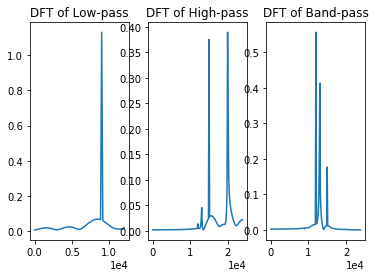

In [34]:
# low pass FIR filter dft 
f=np.arange(0,sample_rate/2.,sample_rate/320.)
YY1=np.fft.fft(filtered_signal)
L=len(filtered_signal)
Pyy1=abs(YY1)/L
YY2=np.fft.fft(filtered_high)
L=len(filtered_high)
Pyy2=abs(YY2)/L
YY3=np.fft.fft(filtered_band)
L=len(filtered_band)
Pyy3=abs(YY3)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
inx=np.where(f>12000)
inx=inx[0]
plt.subplot(131)
plt.plot(f[:inx[0]], Pyy1[:inx[0]])
plt.title('DFT of Low-pass')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(132)
plt.plot(f[:160], Pyy2[:160])
plt.title('DFT of High-pass')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.subplot(133)
plt.plot(f[:160], Pyy3[:160])
plt.title('DFT of Band-pass')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))




# IIR FILTER

The following design an infinite impulse response (IIR) filters using the Python scipy.signal package. 

* Filter name = Bessel Filter
* Filter order = 4
* LOW-pass: The cutoff frequency is the 10 KHz.
* High-Pass: The cutoff frequency is the 15 KHz.
* Band-Pass: between 12.5 to 13.5 KHz.

    The above specifications are the information that will be used and passed to the IIR filter design functions. In addition to our filter specification information we need to select our "filter" type.[4] 

# bessel filter

   when non-sinusoidal waveform(such as square wave) is applied as input to the butterworth low pass filter it results into distortion. The resultant output waveform will have ringing and overshoot. This is due to the fact that component frequencies of square wave will shift in time w.r.t. each other. This is because if the phase increases linearly with frequency, it will result into delay in the output signal by certain constant time period.

  The Bessel filter avoids the situation mentioned above. This filter will introduce linear phase shift with respect to frequency. Hence it will act as a delay line having low pass characteristics. In this type of filter output waveform will not have any ringing and overshoot. The same has been depicted in the figure. It will round off the input square wave at the places where high frequency harmonic components are present in the input waveform.[4]

Text(0.5,0,'Frequency(Hz)')

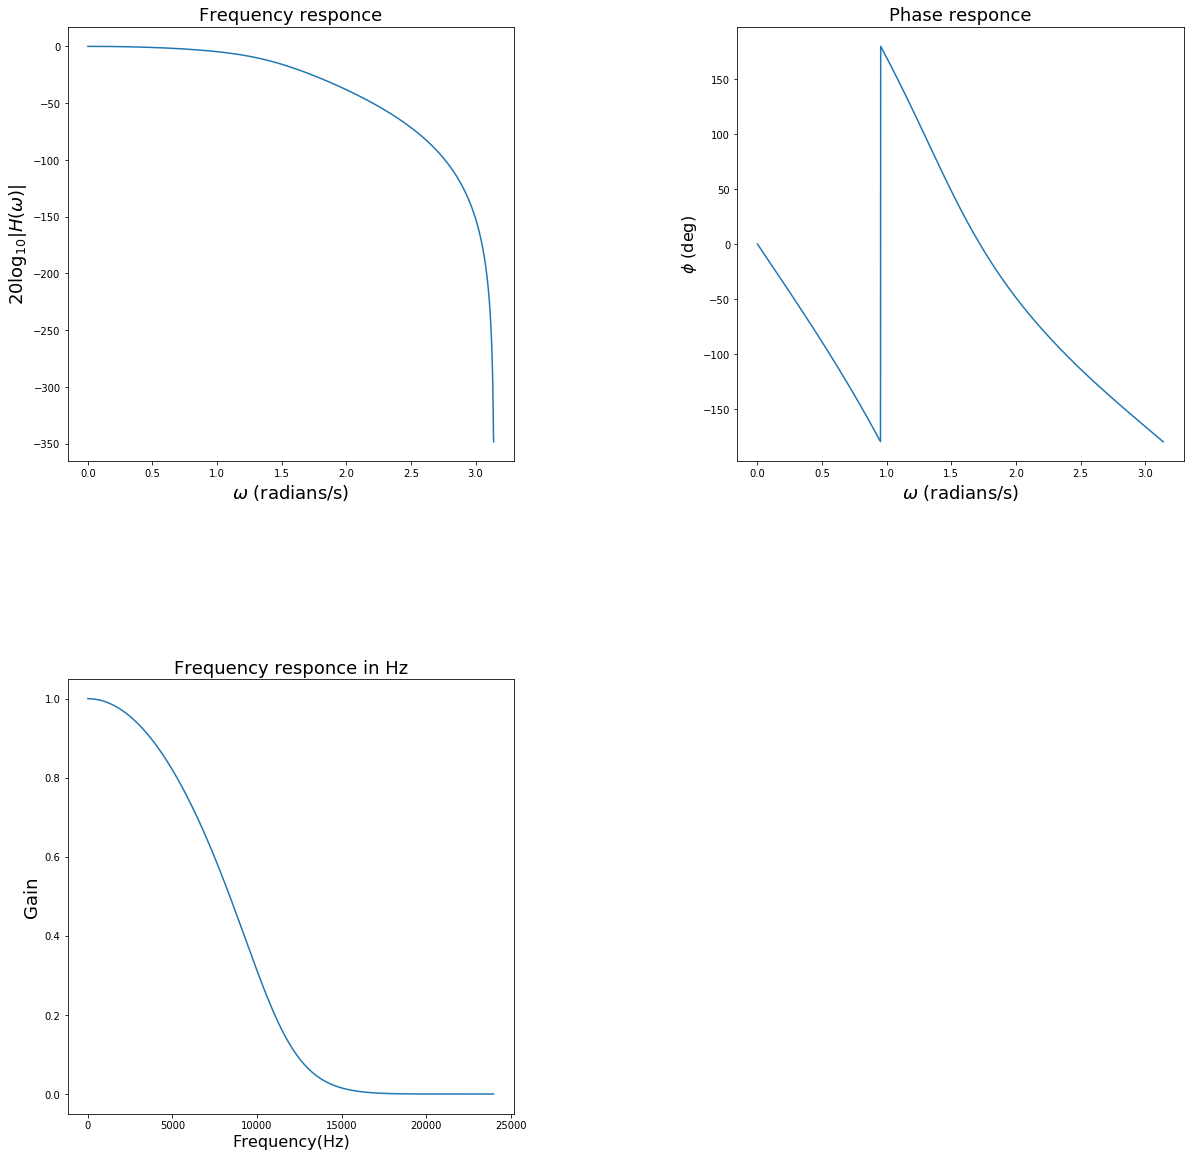

In [40]:
from scipy import signal
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((20,20))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

fs=48000 # sampling freq
NF=fs/2 # nyquiest freq
cutoff= 10000 # cutoff freq
Wn=10000/NF
b, a = signal.bessel(6,Wn, 'low', analog=False)
w, h = signal.freqz(b, a, worN=2000)
s2=signal.lfilter(b,a,data)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency responce',fontsize=18)
ax.plot(w, 20 * np.log10(abs(h))) 
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase responce',fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)

ax = fig.add_subplot(plt.subplot(gs[1,0]))
plt.plot((fs * 0.5 / np.pi) * w, abs(h))
ax.set_title('Frequency responce in Hz',fontsize=18)
ax.set_ylabel('Gain',fontsize=18)
ax.set_xlabel('Frequency(Hz)',fontsize=16)


# Bessel Filtered Vs Unfiltered signal

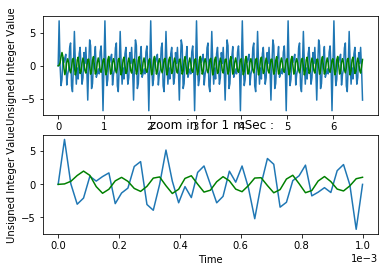

In [36]:
plt.subplot(211)
plt.plot(t,data)
plt.plot(t,s2,'g')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
index=np.where(t>0.001)
index=index[0]
plt.subplot(212)
plt.plot(t[:index[0]],data[:index[0]])
plt.plot(t[:index[0]],s2[:index[0]],'g')
plt.title('\n\n zoom in for 1 mSec :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# HIGH and Band PASS Bessel Filter

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


Text(0.5,0,'time')

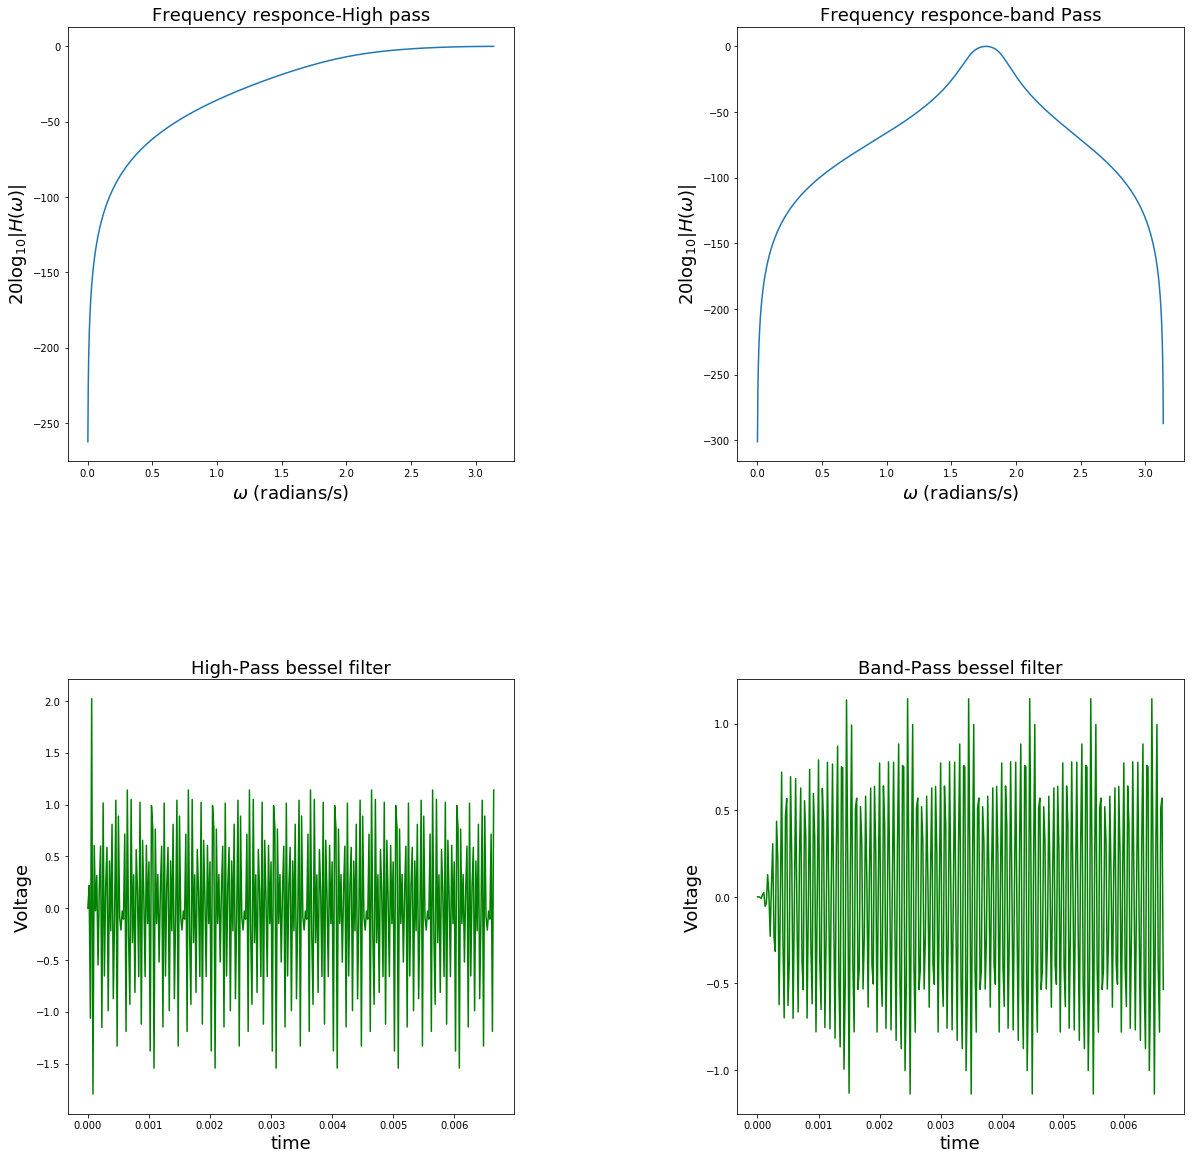

In [37]:
from scipy import signal
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((20,20))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)
fs=48000 # sampling freq
NF=fs/2 # nyquiest freq
cutoff= 15000 # cutoff freq
Wn=15000/NF
b, a = signal.bessel(4,Wn, 'highpass', analog=False)
w, h = signal.freqz(b, a, worN=2000)
s3=signal.lfilter(b,a,data)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency responce-High pass',fontsize=18)
ax.plot(w, 20 * np.log10(abs(h))) 
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
cutoff1= 12500 # cutoff freq
Wn1=12500/NF
cutoff2= 14500 # cutoff freq
Wn2=14500/NF
b, a = signal.bessel(4,[Wn1,Wn2], 'bandpass', analog=False)
w, h = signal.freqz(b, a, worN=2000)
s4=signal.lfilter(b,a,data)
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.set_title('Frequency responce-band Pass',fontsize=18)
ax.plot(w, 20 * np.log10(abs(h))) 
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.set_title('High-Pass bessel filter',fontsize=18)
ax.plot(t,s3,'g') 
ax.set_ylabel("Voltage",fontsize=18)
ax.set_xlabel("time",fontsize=18)
ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.set_title('Band-Pass bessel filter',fontsize=18)
ax.plot(t,s4,'g') 
ax.set_ylabel("Voltage",fontsize=18)
ax.set_xlabel("time",fontsize=18)


# DFT of all Bessel Filters

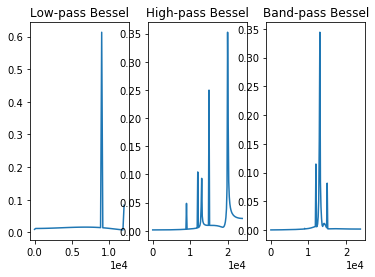

In [38]:
f=np.arange(0,sample_rate/2.,sample_rate/320.)
Y1=np.fft.fft(s2)
L=len(data)
Py1=abs(Y1)/L
Y2=np.fft.fft(s3)
Py2=abs(Y2)/L
Y3=np.fft.fft(s4)
Py3=abs(Y3)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
inx=np.where(f>12000)
inx=inx[0]
plt.subplot(131)
plt.plot(f[:inx[0]], Py1[:inx[0]])
plt.title('Low-pass Bessel')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(132)
plt.plot(f[:160], Py2[:160])
plt.title('High-pass Bessel')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.subplot(133)
plt.plot(f[:160], Py3[:160])
plt.title('Band-pass Bessel')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))




# DFT comperision of LOW-PASS FIR Vs IIR Filter

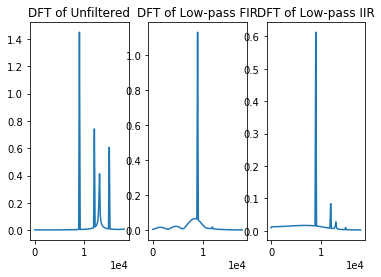

In [39]:

inx=np.where(f>18000)
inx=inx[0]
plt.subplot(131)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of Unfiltered')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(132)
plt.plot(f[:inx[0]], Pyy1[:inx[0]])
plt.title('DFT of Low-pass FIR')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(133)
plt.plot(f[:inx[0]], Py1[:inx[0]])
plt.title('DFT of Low-pass IIR')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



# FIR VS IIR Comparision

From the above implementation we canconclude that,


   * IIR filters are difficult to control without specific phase ,whereas FIR filters have linear phase .
   * IIR can be unstable, whereas FIR is always stable.
   * FIR’s delay characteristics is much better, but they require more memory. On the other hand, IIR filters are dependent           on both i/p and o/p, but FIR is dependent upon i/p only. 
   

   The high computational efficiency of IIR filters, with short delays, often make the IIR popular as an alternative. FIR filters have become too long in digital feedback systems, as well as in other applications, and cause problems.
   
   Summary:
1. IIR is infinite and used for applications where linear characteristics are not of concern.
2. FIR filters are Finite IR filters which are required for linear-phase characteristics.
3. IIR is better for lower-order tapping, whereas the FIR filter is used for higher-order tapping.
4. FIR filters are preferred over IIR because they are more stable, and feedback is not involved.
5. IIR filters are recursive and used as an alternate, whereas FIR filters have become too long and cause problems in various applications.[2]


# Reference
[1] A. Antoniou, Digital Filters: Analysis, Design, and Applications, New York, NY: McGraw-Hill, 1993.

[2] http://www.differencebetween.net/science/difference-between-iir-and-fir-filters/#ixzz50RB0g5ZY
 
 R. Lyons, "Understanding Digital Signal Processing",
      2nd ed., Prentice Hall, Upper Saddle River, New Jersey, 2004 
      
[3] A. Oppenheim, R Schafer, and J. Buck, "Discrete-Time Signal Processing",
      2nd ed., Prentice Hall, Upper Saddle River, New Jersey, 1999
      
[4] S. Smith, "The Scientist and Engineer's Guide to Digital
      Signal Processing", Chp. 17.
